In [ ]:
from google.colab import files

uploaded = files.upload()

Saving new_housing.csv to new_housing.csv


In [ ]:
import pandas as pd
dataset = pd.read_csv("new_housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,2250.000000,0.500000


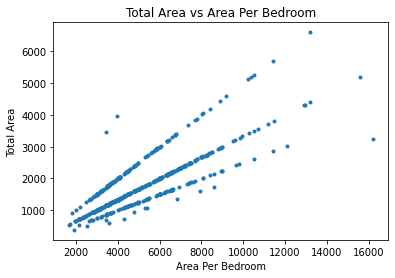

In [ ]:
a1 = dataset["area"]
a2 = dataset["areaperbedroom"]

import matplotlib.pyplot as plt
plt.title("Total Area vs Area Per Bedroom")
plt.xlabel("Area Per Bedroom")
plt.ylabel("Total Area")
plt.plot(a1,a2,'.')
plt.show()


In [ ]:
#Standardization of data
import numpy as np
std1 = (a1-np.mean(a1))/np.std(a1)
std2 = (a2-np.mean(a2))/np.std(a2)
std3 = np.array([std1.T,std2.T])

In [ ]:
#Covariance
covariance = np.cov(np.array([std1,std2]))

In [ ]:
#EigenValue and EigenVector
from numpy import linalg as LA
eigen_val, eigen_vectors = LA.eig(covariance)
print(eigen_val)
print(eigen_vectors)

[1.80892956 0.19474691]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
#forming new feature set along PCA axes
new_feature = np.matmul(std3.T,eigen_vectors[1:].T)
new_feature[:10, :] #printing only 10 rows

array([[ 0.12534103],
       [-0.76130751],
       [-0.49251428],
       [-0.9412383 ],
       [ 0.15065681],
       [ 1.19417762],
       [-1.26536113],
       [-0.19336493],
       [ 0.48971714],
       [ 0.82372857]])